In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# 1.Find the linear regression equation for this data.

In [5]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [6]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


# No skew in the data

# Chart the original data and the equation on the chart

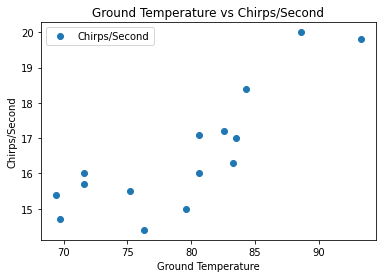

In [7]:
df.plot(x='Ground Temperature', y='Chirps/Second', style='o')
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

In [8]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


There is a linear relationship between chrips/second and ground temperature => we can go ahead and develop a linear regression model. No transformation required.

In [10]:
x = df['Ground Temperature']
X = x.to_frame()
y = df['Chirps/Second']

spliting data into train and test 

In [22]:
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

fiting linear regresion equation 

In [23]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train)

LinearRegression()

The value of m and c

In [24]:
print('intercept:', regressor.intercept_)
print('coefficient:', regressor.coef_)

intercept: -3.0336198281613953
coefficient: [0.24641566]


In [25]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions

y_pred

array([14.60974131, 14.14155156, 14.06762686, 17.49280451, 15.7678949 ])

# R2 score

In [26]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: -1.7578511089911113


# there is very low r2 score it is less than 0.8 there is strong correlation

# Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [32]:
regressor.predict([[95]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([20.37586772])

# if ground temperature reaches 95 then chrips/second is 20.37

Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [34]:
(18 - regressor.intercept_) / regressor.coef_

array([85.35829244])

# on morning the cricket were chriping at a rate of 18 chrips per second the ground temperature that morning is 85.35

Conclusion: by spliting data there is very low R2 score 

# without spliting data

In [27]:
linreg = linear_model.LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [28]:
print('intercept:', linreg.intercept_)
print('coefficient:', linreg.coef_)

intercept: 0.45931464523595267
coefficient: [0.20299973]


# Chart the original data and the equation on the chart.

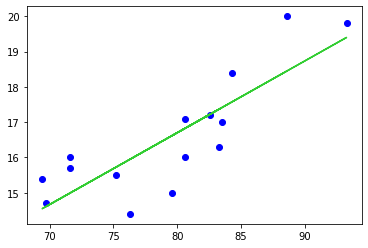

In [29]:
plt.scatter(X, y, color='blue')
plt.plot(X, linreg.predict(X), color='limegreen')

Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [30]:
print('r-squared: ', linreg.score(X, y))

r-squared:  0.6922946529146998


# The Equation is not good fit R square is less 0.8 there is no strong correlation

 Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [31]:
linreg.predict([[95]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([19.74428913])

# if ground temperature reaches 95 then chrips/second is 19.74

 Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
(18 - linreg.intercept_) / linreg.coef_

array([86.40743135])

# on morning the cricket were chriping at a rate of 18 chrips per second the ground temperature that morning is 86.40

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('drive/My Drive/Colab Notebooks/dataset')

# laoding data

In [37]:
df = pd.read_fwf("brain_body.txt")

In [43]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [44]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [38]:
X = df['Brain']
X = X.to_frame()
y = df['Body']

# Find the linear regression equation for this data for brain weight to body weight

In [39]:
linreg = linear_model.LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [40]:
print('intercept:', linreg.intercept_)
print('coefficient:', linreg.coef_)

intercept: 91.00439620740687
coefficient: [0.96649637]


# Chart the original data and the equation on the chart.

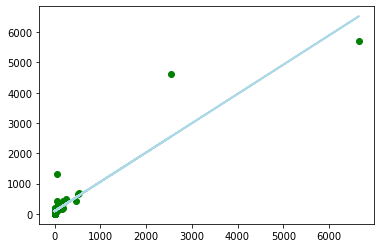

In [41]:
plt.scatter(X, y, color='green')
plt.plot(X, linreg.predict(X), color='lightblue', linewidth=2)

# Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [42]:
print('r-squared: ', linreg.score(X, y))

r-squared:  0.8726620843043331


The Equation is good fit for this data R2 score greater then 0.8 there is strong correlation

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [5]:
import pandas as pd
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [6]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [3]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [47]:
feature = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
X = df[feature]
y = df.Salary

In [48]:
linreg = linear_model.LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [49]:
print('intercept:', linreg.intercept_)
print('coefficient:', linreg.coef_)

intercept: 11410.14654725559
coefficient: [ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354]


In [50]:
print('r-squared: ', linreg.score(X, y))

r-squared:  0.8547180674410969


In [51]:
print('Features & Coefficients')
print(list(zip(feature, linreg.coef_)))

Features & Coefficients
[('Sex', 1241.792499601427), ('Rank', 5586.1814495214385), ('Year', 482.85976782882153), ('Degree', -1331.6440634059095), ('YSdeg', -128.79057354486122)]
